In [1]:
# AFN05 -- AFN que reconhece strings binárias contendo a substring '110'.

class NFA:
    def __init__(self, states, alphabet, transition_function, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transition_function = transition_function
        self.start_state = start_state
        self.accept_states = accept_states

    def _epsilon_closure(self, state):
        stack = [state]
        closure = {state}

        while stack:
            current_state = stack.pop()
            if current_state in self.transition_function and '' in self.transition_function[current_state]:
                for next_state in self.transition_function[current_state]['']:
                    if next_state not in closure:
                        closure.add(next_state)
                        stack.append(next_state)
        return closure

    def _move(self, states, symbol):
        new_states = set()
        for state in states:
            if state in self.transition_function and symbol in self.transition_function[state]:
                new_states.update(self.transition_function[state][symbol])
        return new_states

    def accept(self, input_string):
        current_states = self._epsilon_closure(self.start_state)

        for symbol in input_string:
            new_states = set()
            for s in self._move(current_states, symbol):
                new_states.update(self._epsilon_closure(s))
            current_states = new_states

        return bool(current_states & set(self.accept_states))

# Definição do autômato
states = {'q0', 'q1', 'q2','q3'}
alphabet = {'0', '1'}
transition_function = {
    'q0': {'0': {'q0'}, '1': {'q1'}},
    'q1': {'0': {'q0'}, '1': {'q2'}},
    'q2': {'0': {'q3'}, '1': {'q2'}},
    'q3': {'0': {'q3'}, '1': {'q3'}}
}
start_state = 'q0'
accept_states = {'q3'}

# Inicializando o AFN
nfa = NFA(states, alphabet, transition_function, start_state, accept_states)

# Testando o AFN
test_strings = ['01', '00', '111', '010', '0101','1100','000100100','1111111', '0110', '0100011100010', '000', '101010', '0001110100']
for string in test_strings:
    print(f"String '{string}' é aceita? {nfa.accept(string)}")

String '01' é aceita? False
String '00' é aceita? False
String '111' é aceita? False
String '010' é aceita? False
String '0101' é aceita? False
String '1100' é aceita? True
String '000100100' é aceita? False
String '1111111' é aceita? False
String '0110' é aceita? True
String '0100011100010' é aceita? True
String '000' é aceita? False
String '101010' é aceita? False
String '0001110100' é aceita? True


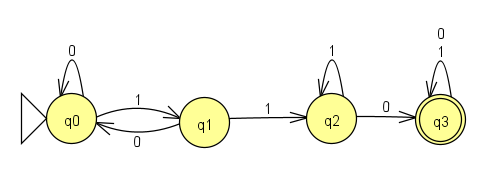